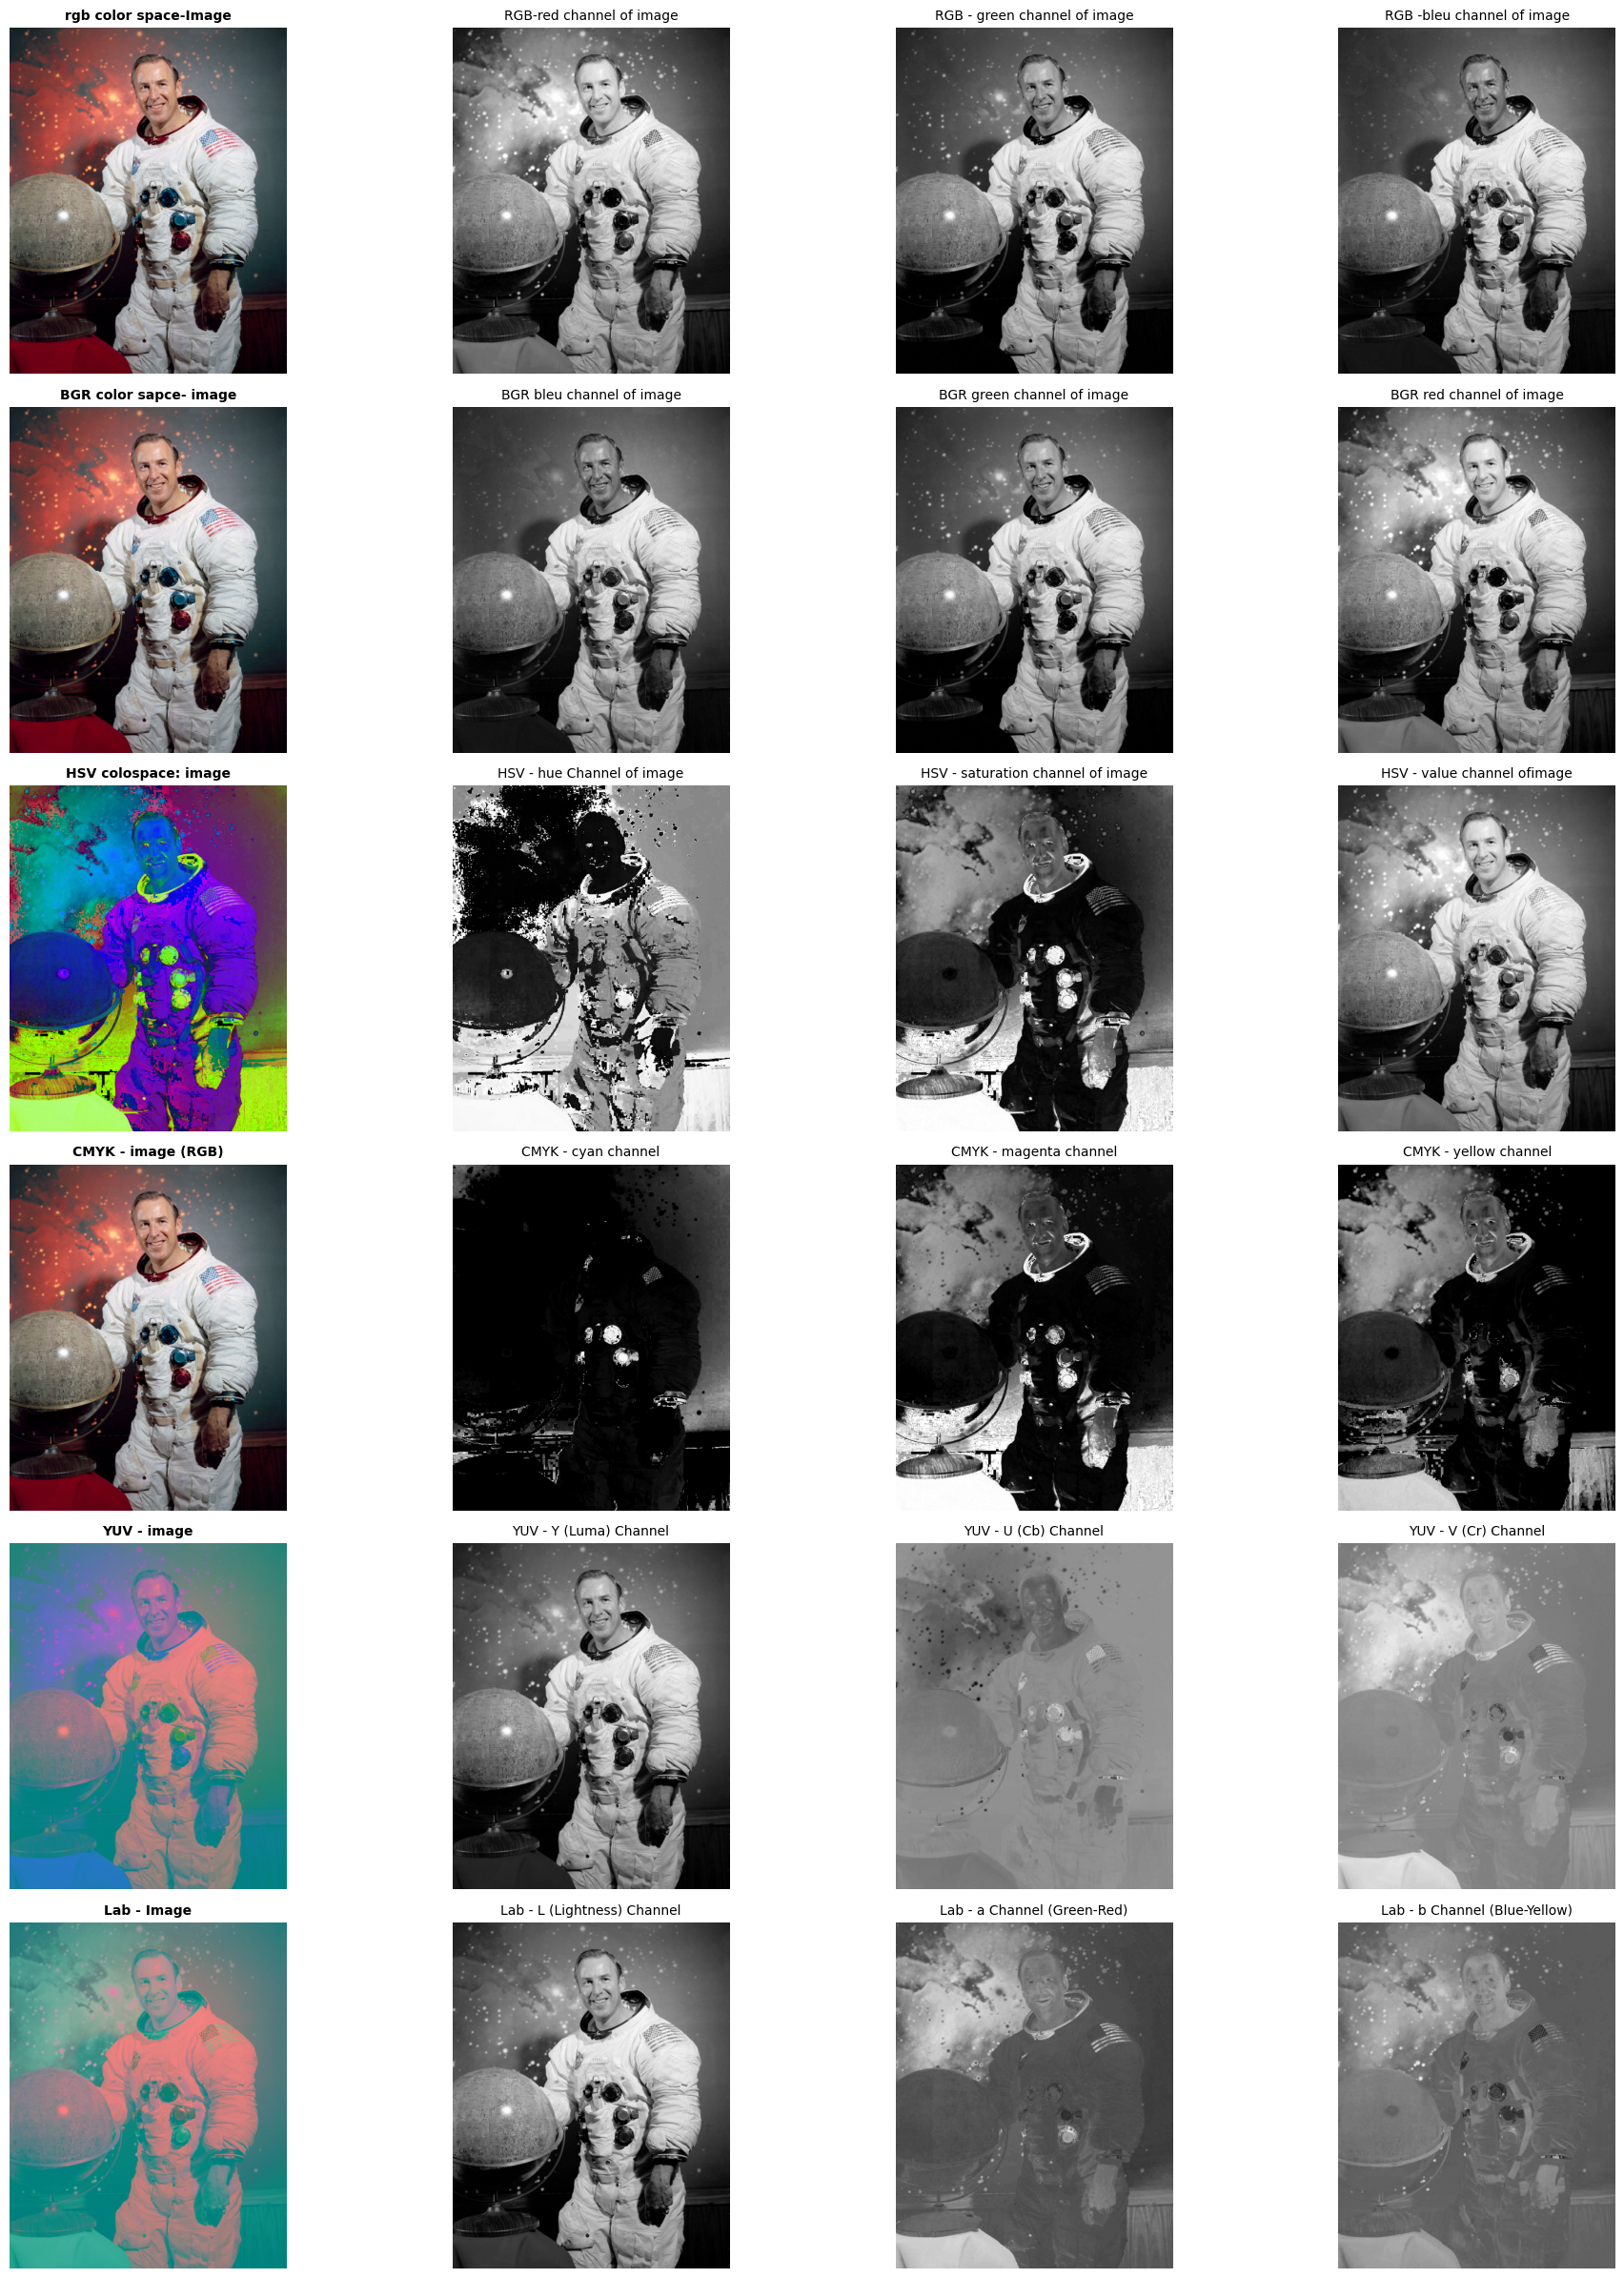

channel extraction is complete..
color spaces analyzed: 6 (RGB, BGR, HSV, CMYK, YUV, Lab)
image shape: (1080, 864, 3)


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# loadimg image
img_bgr = cv2.imread('astronaut.jpg')

if img_bgr is None:
    raise FileNotFoundError("image file astronaut.jpg is not found.")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  # converting image to RGB-format color space

# function to convert RGB image to CMYK-image
def rgb_to_cmyk(img):
    # convert rgb  to cmyk color space
    rgb_scale = img / 255.0
    k = 1 - np.max(rgb_scale, axis=2)
    c = (1 - rgb_scale[:,:,0] - k) / (1 - k + 1e-10)
    m = (1 - rgb_scale[:,:,1] - k) / (1 - k + 1e-10)
    y = (1 - rgb_scale[:,:,2] - k) / (1 - k + 1e-10)
    return c, m, y, k

# 1 rgb colorspace
r_channel = img_rgb[:,:,0]
g_channel = img_rgb[:,:,1]
b_channel = img_rgb[:,:,2]

# 2 bgr colorspace
b_channel_bgr = img_bgr[:,:,0]
g_channel_bgr = img_bgr[:,:,1]
r_channel_bgr = img_bgr[:,:,2]

# 3 hsv colorspace
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
h_channel = img_hsv[:,:,0]
s_channel = img_hsv[:,:,1]
v_channel = img_hsv[:,:,2]

# 4 cmyk colorspace
c_channel, m_channel, y_channel, k_channel = rgb_to_cmyk(img_rgb)
# convert to 0 to 255 range to display
c_channel = (c_channel * 255).astype(np.uint8)
m_channel = (m_channel * 255).astype(np.uint8)
y_channel = (y_channel * 255).astype(np.uint8)
k_channel = (k_channel * 255).astype(np.uint8)

# 5 yuv colorspace
img_yuv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YUV)
y_channel_yuv = img_yuv[:,:,0]
u_channel = img_yuv[:,:,1]
v_channel_yuv = img_yuv[:,:,2]

# 6 lab colorspace
img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)
l_channel = img_lab[:,:,0]
a_channel = img_lab[:,:,1]
b_channel_lab = img_lab[:,:,2]

# display figure
fig = plt.figure(figsize=(20, 24))

# rgb colorspace
plt.subplot(6, 4, 1)
plt.imshow(img_rgb)
plt.title('rgb color space-Image', fontsize=10, fontweight='bold')
plt.axis('off')

plt.subplot(6, 4, 2)
plt.imshow(r_channel, cmap='gray')
plt.title('RGB-red channel of image', fontsize=10)
plt.axis('off')

plt.subplot(6, 4, 3)
plt.imshow(g_channel, cmap='gray')
plt.title('RGB - green channel of image', fontsize=10)
plt.axis('off')

plt.subplot(6, 4, 4)
plt.imshow(b_channel, cmap='gray')
plt.title('RGB -bleu channel of image', fontsize=10)
plt.axis('off')

# bgr colorspace
plt.subplot(6, 4, 5)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.title('BGR color sapce- image', fontsize=10, fontweight='bold')
plt.axis('off')

plt.subplot(6, 4, 6)
plt.imshow(b_channel_bgr, cmap='gray')
plt.title('BGR bleu channel of image', fontsize=10)
plt.axis('off')

plt.subplot(6, 4, 7)
plt.imshow(g_channel_bgr, cmap='gray')
plt.title('BGR green channel of image', fontsize=10)
plt.axis('off')

plt.subplot(6, 4, 8)
plt.imshow(r_channel_bgr, cmap='gray')
plt.title('BGR red channel of image', fontsize=10)
plt.axis('off')

# hsv colorsspace
plt.subplot(6, 4, 9)
plt.imshow(img_hsv)
plt.title('HSV colospace: image', fontsize=10, fontweight='bold')
plt.axis('off')

plt.subplot(6, 4, 10)
plt.imshow(h_channel, cmap='gray')
plt.title('HSV - hue Channel of image', fontsize=10)
plt.axis('off')

plt.subplot(6, 4, 11)
plt.imshow(s_channel, cmap='gray')
plt.title('HSV - saturation channel of image', fontsize=10)
plt.axis('off')

plt.subplot(6, 4, 12)
plt.imshow(v_channel, cmap='gray')
plt.title('HSV - value channel ofimage', fontsize=10)
plt.axis('off')

# cmyk colorspace
plt.subplot(6, 4, 13)
plt.imshow(img_rgb)
plt.title('CMYK - image (RGB)', fontsize=10, fontweight='bold')
plt.axis('off')

plt.subplot(6, 4, 14)
plt.imshow(c_channel, cmap='gray')
plt.title('CMYK - cyan channel', fontsize=10)
plt.axis('off')

plt.subplot(6, 4, 15)
plt.imshow(m_channel, cmap='gray')
plt.title('CMYK - magenta channel', fontsize=10)
plt.axis('off')

plt.subplot(6, 4, 16)
plt.imshow(y_channel, cmap='gray')
plt.title('CMYK - yellow channel', fontsize=10)
plt.axis('off')

# YUV colorspace
plt.subplot(6, 4, 17)
plt.imshow(img_yuv)
plt.title('YUV - image', fontsize=10, fontweight='bold')
plt.axis('off')

plt.subplot(6, 4, 18)
plt.imshow(y_channel_yuv, cmap='gray')
plt.title('YUV - Y (Luma) Channel', fontsize=10)
plt.axis('off')

plt.subplot(6, 4, 19)
plt.imshow(u_channel, cmap='gray')
plt.title('YUV - U (Cb) Channel', fontsize=10)
plt.axis('off')

plt.subplot(6, 4, 20)
plt.imshow(v_channel_yuv, cmap='gray')
plt.title('YUV - V (Cr) Channel', fontsize=10)
plt.axis('off')

# lab color space
plt.subplot(6, 4, 21)
plt.imshow(img_lab)
plt.title('Lab - Image', fontsize=10, fontweight='bold')
plt.axis('off')

plt.subplot(6, 4, 22)
plt.imshow(l_channel, cmap='gray')
plt.title('Lab - L (Lightness) Channel', fontsize=10)
plt.axis('off')

plt.subplot(6, 4, 23)
plt.imshow(a_channel, cmap='gray')
plt.title('Lab - a Channel (Green-Red)', fontsize=10)
plt.axis('off')

plt.subplot(6, 4, 24)
plt.imshow(b_channel_lab, cmap='gray')
plt.title('Lab - b Channel (Blue-Yellow)', fontsize=10)
plt.axis('off')

plt.tight_layout()
plt.show()

print("channel extraction is complete..")
print(f"color spaces analyzed: 6 (RGB, BGR, HSV, CMYK, YUV, Lab)")
print(f"image shape: {img_rgb.shape}")


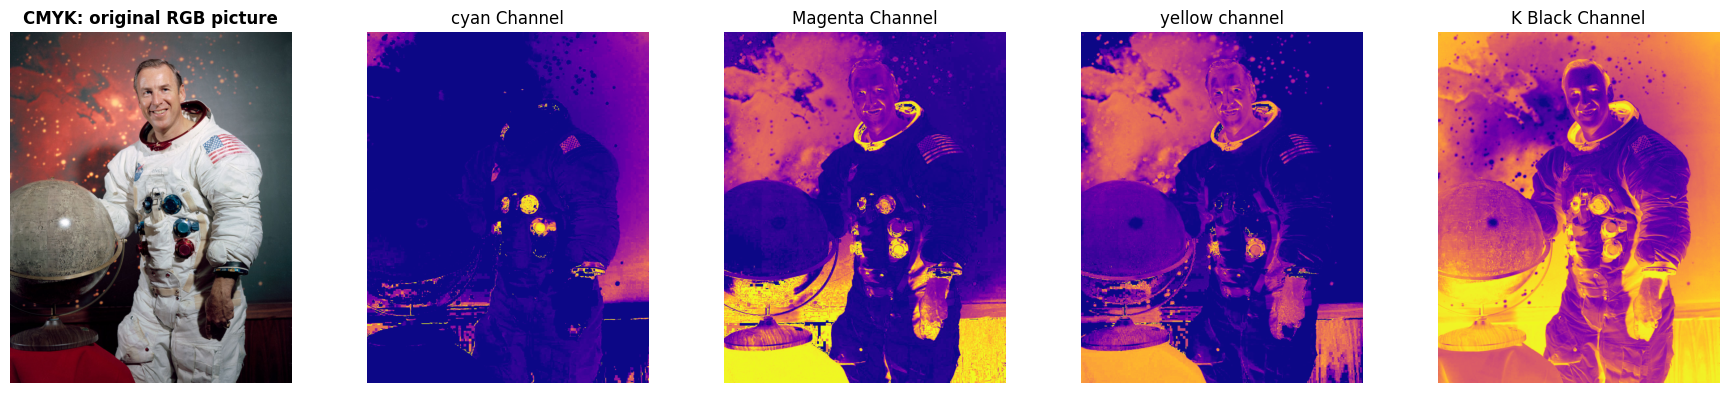

In [8]:
# CMYK 4 channels including K (Black): additional
fig, axes = plt.subplots(1, 5, figsize=(18, 4))

axes[0].imshow(img_rgb)
axes[0].set_title('CMYK: original RGB picture', fontweight='bold')
axes[0].axis('off')

axes[1].imshow(c_channel, cmap='plasma')
axes[1].set_title('cyan Channel')
axes[1].axis('off')

axes[2].imshow(m_channel, cmap='plasma')
axes[2].set_title('Magenta Channel')
axes[2].axis('off')

axes[3].imshow(y_channel, cmap='plasma')
axes[3].set_title('yellow channel')
axes[3].axis('off')

axes[4].imshow(k_channel, cmap='plasma')
axes[4].set_title('K Black Channel')
axes[4].axis('off')

plt.tight_layout()
plt.show()

## luminous / brightness channels
- RGB: no brightness channel
- Lab: brightness is L (Lightness).
- YUV: brightness is Y (Luma).
- HSV: brightness is V (Value).

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def read_rgb(path):
    img_bgr = cv2.imread(path)
    if img_bgr is None:
        raise FileNotFoundError(f"pciture is not found: {path}")
    return cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

def match_size(img_a, img_b):
    if img_a.shape[:2] == img_b.shape[:2]:
        return img_a, img_b
    h, w = img_a.shape[:2]
    img_b_resized = cv2.resize(img_b, (w, h), interpolation=cv2.INTER_AREA)
    return img_a, img_b_resized

def rgb_remove_brightness(img_rgb, target_intensity=128.0):
    img = img_rgb.astype(np.float32)
    intensity = img.mean(axis=2, keepdims=True)
    img_norm = img / (intensity + 1e-6) * target_intensity
    return np.clip(img_norm, 0, 255).astype(np.uint8)

def hsv_remove_brightness(img_rgb, target_v=128):
    hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
    hsv[:, :, 2] = target_v
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

def lab_remove_brightness(img_rgb, target_l=128):
    lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)
    lab[:, :, 0] = target_l
    return cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

def yuv_remove_brightness(img_rgb, target_y=128):
    yuv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YUV)
    yuv[:, :, 0] = target_y
    return cv2.cvtColor(yuv, cv2.COLOR_YUV2RGB)

def euclidean_distance(img_a, img_b):
    diff = img_a.astype(np.float32) - img_b.astype(np.float32)
    per_pixel = np.sqrt(np.sum(diff ** 2, axis=2))
    return float(per_pixel.mean())

def show_pair(title_left, img_left, title_right, img_right, figsize=(10, 4)):
    plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    plt.imshow(img_left)
    plt.title(title_left)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(img_right)
    plt.title(title_right)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

images of late morning (noon) and evening of block 3 taken from hostel boys-1

In [10]:
noon_path = "/content/block_3_picture_in_late-morning.jpeg"
evening_path = "/content/block_3_picture_in_evening.jpeg"

img_noon = read_rgb(noon_path)
img_evening = read_rgb(evening_path)
img_noon, img_evening = match_size(img_noon, img_evening)
print('evening image shape:', img_evening.shape)
print('late morning(noon) image shape:', img_noon.shape)


Noon image shape: (1197, 1600, 3)
Evening image shape: (1197, 1600, 3)


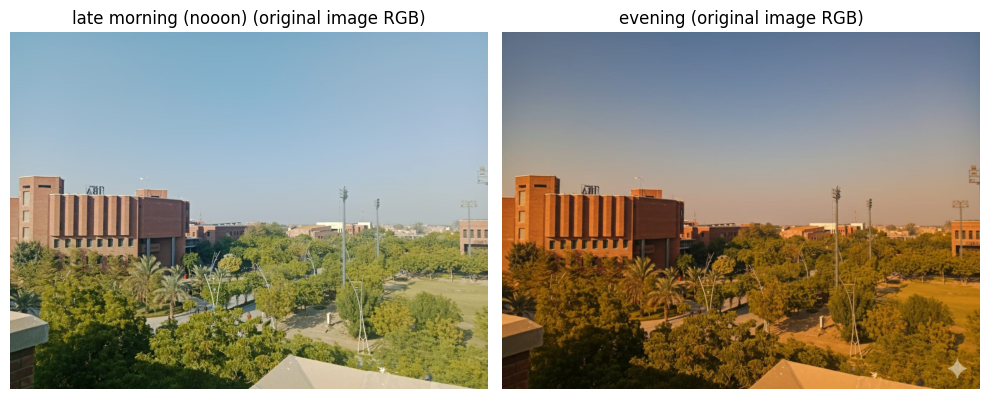

In [13]:

show_pair('late morning (nooon) (original image RGB)', img_noon, 'evening (original image RGB)', img_evening)

removed brightness / luminous effect

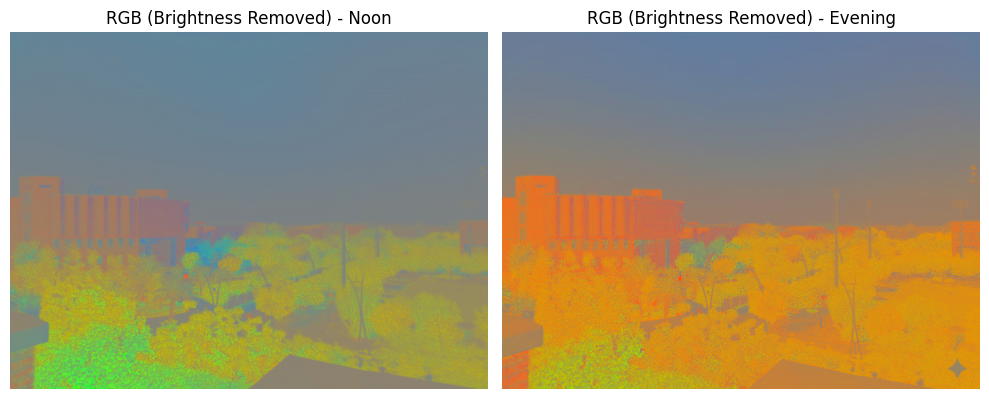

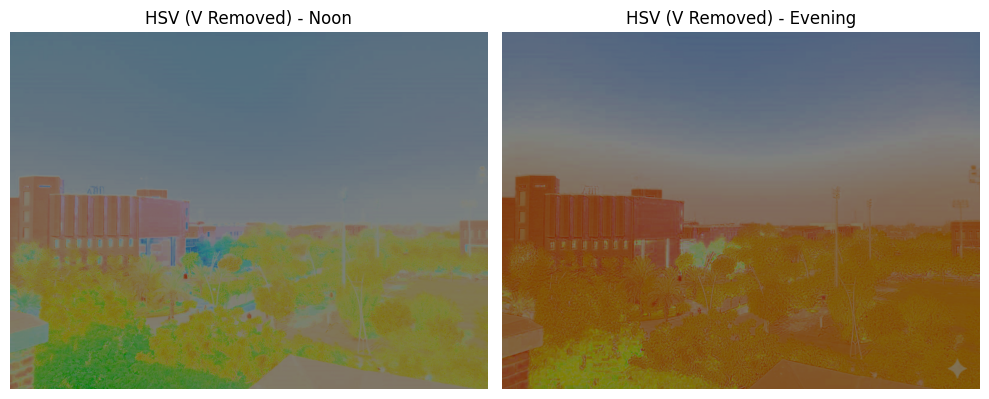

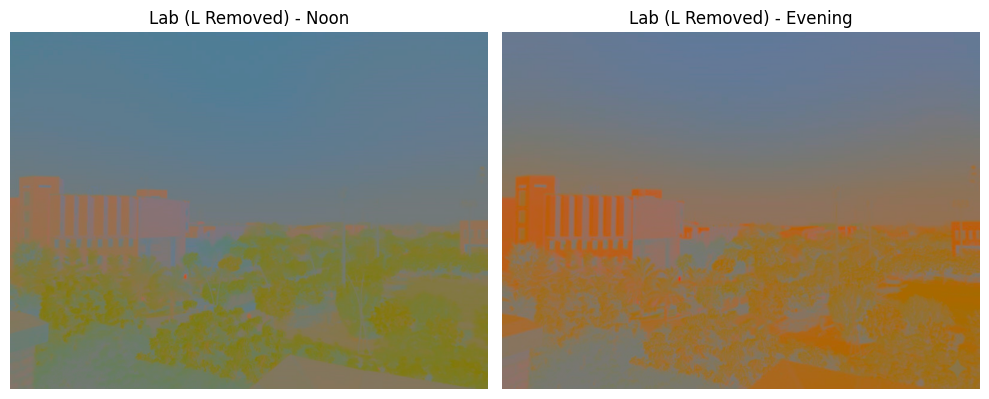

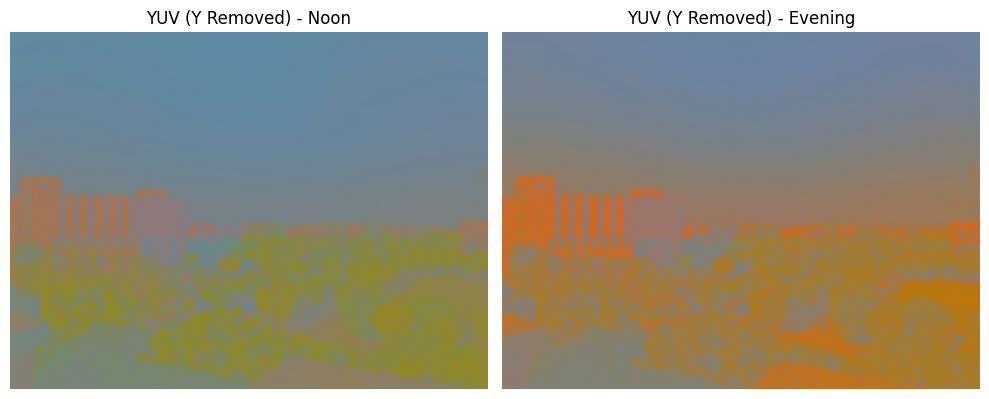

In [14]:
noon_rgb_norm = rgb_remove_brightness(img_noon)
eve_rgb_norm = rgb_remove_brightness(img_evening)

noon_hsv_no_v = hsv_remove_brightness(img_noon)
eve_hsv_no_v = hsv_remove_brightness(img_evening)

noon_lab_no_l = lab_remove_brightness(img_noon)
eve_lab_no_l = lab_remove_brightness(img_evening)

noon_yuv_no_y = yuv_remove_brightness(img_noon)
eve_yuv_no_y = yuv_remove_brightness(img_evening)

show_pair('RGB (Brightness Removed) - Noon', noon_rgb_norm, 'RGB (Brightness Removed) - Evening', eve_rgb_norm)
show_pair('HSV (V Removed) - Noon', noon_hsv_no_v, 'HSV (V Removed) - Evening', eve_hsv_no_v)
show_pair('Lab (L Removed) - Noon', noon_lab_no_l, 'Lab (L Removed) - Evening', eve_lab_no_l)
show_pair('YUV (Y Removed) - Noon', noon_yuv_no_y, 'YUV (Y Removed) - Evening', eve_yuv_no_y)

finding euclidiean distance among them [in  rgb, hsv and lab vs original]

In [17]:
dist_rgb = euclidean_distance(img_noon, img_evening)
dist_hsv = euclidean_distance(cv2.cvtColor(img_noon, cv2.COLOR_RGB2HSV),
                               cv2.cvtColor(img_evening, cv2.COLOR_RGB2HSV))
dist_lab = euclidean_distance(cv2.cvtColor(img_noon, cv2.COLOR_RGB2LAB),
                               cv2.cvtColor(img_evening, cv2.COLOR_RGB2LAB))

print('euclidean distance (original image):')
print('RGB:', dist_rgb)
print('Lab:', dist_lab)
print('HSV:', dist_hsv)


euclidean distance (original image):
RGB: 76.54502868652344
Lab: 44.146575927734375
HSV: 87.3747787475586


In [ ]:
# finding euclidean distance after brightness removal from them [ rgb, hsv and lab, original]

In [18]:
dist_rgb_norm = euclidean_distance(noon_rgb_norm, eve_rgb_norm)
dist_hsv_norm = euclidean_distance(noon_hsv_no_v, eve_hsv_no_v)
dist_lab_norm = euclidean_distance(noon_lab_no_l, eve_lab_no_l)
dist_yuv_norm = euclidean_distance(noon_yuv_no_y, eve_yuv_no_y)

print('euclidean distance:')
print('RGB (intensity-normalized):', dist_rgb_norm)
print('Lab (L removed):', dist_lab_norm)
print('YUV (Y removed):', dist_yuv_norm)
print('HSV (V removed):', dist_hsv_norm)


euclidean distance:
RGB (intensity-normalized): 48.71895217895508
Lab (L removed): 34.02314758300781
YUV (Y removed): 32.644935607910156
HSV (V removed): 41.21315383911133
